In [ ]:
# The mnist.load_data() function returns two tuples containing the training and testing data
# train_data contains the images for training, and train_target contains their corresponding labels
# test_data and test_target are for evaluating the model's performance after training
(train_data, train_target), (test_data, test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Import the MNIST dataset loader, the Sequential model API, and Layer types from Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Import a utility to convert labels to a categorical format (one-hot encoding)
from tensorflow.keras.utils import to_categorical

# Import pyplot from matplotlib for creating visualizations
from matplotlib import pyplot as plt

# Import numpy for numerical operations, especially with arrays
import numpy as np

In [7]:
# The mnist.load_data() function returns two tuples containing the training and testing data
# train_data contains the images for training, and train_target contains their corresponding labels
# test_data and test_target are for evaluating the model's performance after training
(train_data, train_target), (test_data, test_target) = mnist.load_data()

Target labels:  [6 2 6 7 3 1 4 0 3 7]


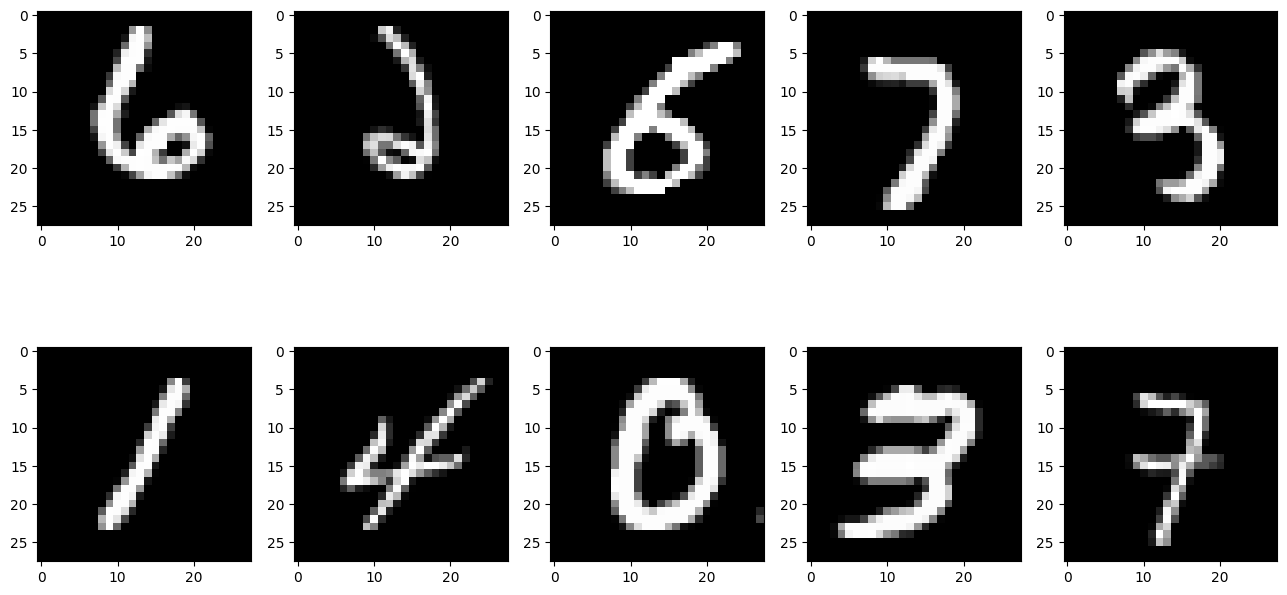

In [8]:
# Create a figure and a grid of subplots (2 rows, 5 columns) to display images
fig, axs = plt.subplots(2, 5, figsize=(16, 8))

# Generate 10 random numbers to use as indices for selecting images
random_numbers = np.random.randint(0, 60000, 10)

# Print the labels of the randomly selected images
print('Target labels: ', train_target[random_numbers])

# Loop through the subplots and display a random image in each one
for idx, ax in enumerate(axs.ravel()):
    # Display the image at the random index, using a grayscale color map
    ax.imshow(train_data[random_numbers[idx]], cmap='gray')

# Show the plot with all the images
plt.show()

In [9]:
# Normalize the training and testing image data by dividing each pixel value by 255.0
# This scales the pixel values to be between 0.0 and 1.0, which improves training performance
new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

# Convert the integer target labels (0-9) into a one-hot encoded format
# This is required for the 'categorical_crossentropy' loss function
new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

In [10]:
# Initialize a Sequential model, which allows you to build a model layer by layer
model = Sequential()

# Add the first layer: a Flatten layer. This converts the 2D image (28x28 pixels)
# into a 1D array of 784 pixels to be fed into the dense layers.
model.add(Flatten(input_shape=(28, 28)))

# Add the first hidden layer: a Dense (fully connected) layer with 64 neurons
# and the 'relu' (Rectified Linear Unit) activation function.
model.add(Dense(64, activation='relu'))

# Add a second hidden layer with 64 neurons and 'relu' activation.
# The 'input_dim' argument is not necessary here as Keras infers the shape from the previous layer.
model.add(Dense(64, input_dim=64, activation='relu'))

# Add a third hidden layer with 32 neurons and 'relu' activation.
model.add(Dense(32, input_dim=64, activation='relu'))

# Add the output layer: a Dense layer with 10 neurons (one for each digit 0-9).
# The 'softmax' activation function converts the output into a probability distribution across the 10 classes.
model.add(Dense(10, input_dim=32, activation='softmax'))

# Compile the model to configure it for training.
# 'loss' specifies the function to measure the model's error.
# 'optimizer' is the algorithm used to update the model's weights (adam is a popular choice).
# 'metrics' specifies what performance measure to track during training (accuracy).
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# The .summary() method provides a concise overview of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# The .fit() method trains the model on the provided training data and labels.
# 'epochs = 10' means the model will iterate through the entire training dataset 10 times.
# The training progress (loss and accuracy) is stored in the 'train_info' object.
train_info = model.fit(new_train_data, new_train_target, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8465 - loss: 0.5046
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9592 - loss: 0.1361
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9707 - loss: 0.0964
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0769
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9804 - loss: 0.0600
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0479
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9860 - loss: 0.0445
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0379
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0344
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0294


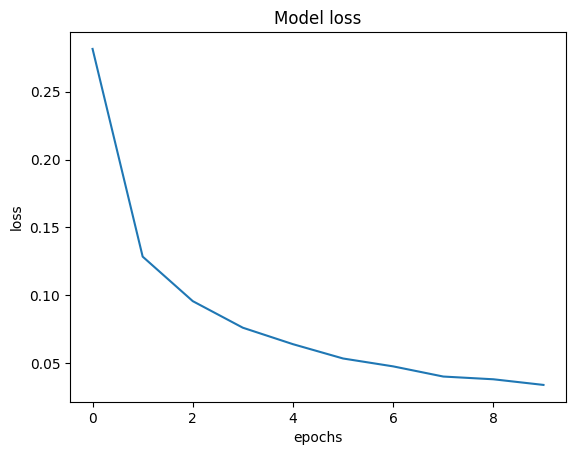

In [13]:
# Plot the training loss from the 'train_info' history object
plt.plot(train_info.history['loss'])
# Label the x-axis as 'epochs'
plt.xlabel('epochs')
# Label the y-axis as 'loss'
plt.ylabel('loss')
# Set the title of the plot
plt.title('Model loss')
# Display the plot
plt.show()

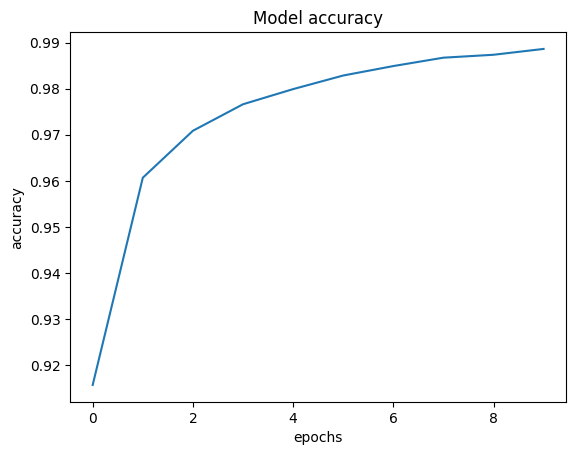

In [14]:
# Plot the training accuracy from the 'train_info' history object
plt.plot(train_info.history['accuracy'])
# Label the axes and title of the plot
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
# Display the plot
plt.show()

In [15]:
# The .evaluate() method computes the loss and accuracy of the model on the test dataset.
loss, acc = model.evaluate(new_test_data, new_test_target)

# Print the final test loss and accuracy
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1334
Loss of the Test dataset is: 0.10834351927042007
Accuracy of the test dataset is: 0.9735999703407288


In [17]:
# The .save_weights() method saves the model's internal state to an H5 file.
# The filename must end with '.weights.h5' in newer Keras versions.
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')